In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

train = pd.read_csv('train_bikes.csv')

In [25]:
dt = pd.to_datetime(train['datetime'])

train['datetime']    = dt
train['hour']        = dt.dt.hour
train['day_of_week'] = dt.dt.dayofweek
train['month']       = dt.dt.month


threshold = train['count'].quantile(0.75)
train['high_demand'] = (train['count'] >= threshold).astype(int)

features = [
    'season', 'holiday', 'workingday', 'weather',
    'temp', 'atemp', 'humidity', 'windspeed',
    'hour', 'dayofweek', 'month'
]
feature_data = train[features]
demand_label = train['high_demand']

training_features, validation_features, training_labels, validation_labels = train_test_split(
    feature_data,
    demand_label,
    test_size=0.2,
    stratify=demand_label,
    random_state=42
)

demand_classifier = LogisticRegression(max_iter=1000)
demand_classifier.fit(training_features, training_labels)


val_predictions = log_reg.predict(val_feats)

print(classification_report(val_labels, val_predictions))


              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1633
           1       0.62      0.35      0.45       545

    accuracy                           0.78      2178
   macro avg       0.71      0.64      0.66      2178
weighted avg       0.76      0.78      0.76      2178



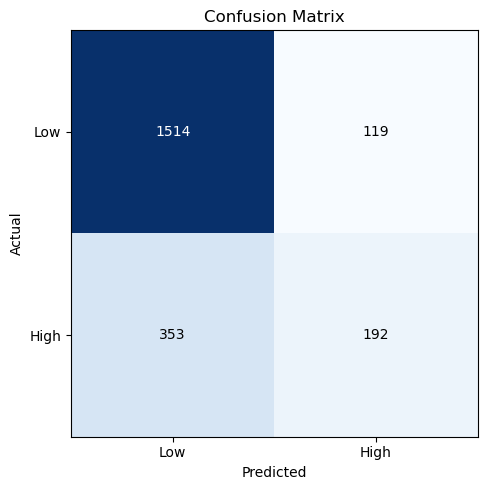

In [27]:
conf_mat = confusion_matrix(validation_labels, val_predictions)

canvas = plt.figure(figsize=(5, 5))
panel = canvas.add_subplot()
panel.imshow(conf_mat, interpolation='nearest', cmap='Blues')
panel.set_xticks([0, 1])
panel.set_xticklabels(['Low', 'High'])
panel.set_yticks([0, 1])
panel.set_yticklabels(['Low', 'High'])
panel.set_xlabel('Predicted')
panel.set_ylabel('Actual')
panel.set_title('Confusion Matrix')

for row in range(conf_mat.shape[0]):
    for col in range(conf_mat.shape[1]):
        count = conf_mat[row, col]
        text_color = 'white' if count > conf_mat.max() / 2 else 'black'
        panel.text(col, row, count, ha='center', va='center', color=text_color)

plt.tight_layout()
plt.show()

In [18]:
val_data = X_val.copy()
val_data['actual']    = y_val
val_data['predicted'] = y_pred
misclassified = val_data[val_data['actual'] != val_data['predicted']].head(5)

print("\nFive Misclassified Samples:\n")
print(misclassified)


Five Misclassified Samples:

      season  holiday  workingday  weather   temp   atemp  humidity  \
9658       4        0           0        1  19.68  23.485        55   
7548       2        0           0        2  26.24  31.060        53   
6274       1        0           1        1  17.22  21.210        32   
4529       4        0           1        1  17.22  21.210        58   
9314       3        0           1        1  26.24  31.060        33   

      windspeed  hour  dayofweek  month  actual  predicted  
9658    15.0013    19          5     10       1          0  
7548    12.9980    21          6      5       0          1  
6274    19.9995    16          4      2       1          0  
4529     6.0032    19          1     11       1          0  
9314     6.0032    11          1      9       0          1  


In [19]:
test = pd.read_csv('test_bikes.csv')

test['datetime']   = pd.to_datetime(test['datetime'])
test['hour']       = test['datetime'].dt.hour
test['dayofweek']  = test['datetime'].dt.dayofweek
test['month']      = test['datetime'].dt.month

X_test_kaggle = test[features]

test['high_demand_pred'] = model.predict(X_test_kaggle)

print(test[['datetime','season','temp']].head())     
print(test[['datetime','high_demand_pred']].head())

             datetime  season   temp
0 2011-01-20 00:00:00       1  10.66
1 2011-01-20 01:00:00       1  10.66
2 2011-01-20 02:00:00       1  10.66
3 2011-01-20 03:00:00       1  10.66
4 2011-01-20 04:00:00       1  10.66
             datetime  high_demand_pred
0 2011-01-20 00:00:00                 0
1 2011-01-20 01:00:00                 0
2 2011-01-20 02:00:00                 0
3 2011-01-20 03:00:00                 0
4 2011-01-20 04:00:00                 0


In [20]:
test_high = test[test['high_demand_pred'] == 1]
print(test_high[['datetime','season','temp','high_demand_pred']].head(10))

               datetime  season   temp  high_demand_pred
759 2011-04-20 15:00:00       2  31.16                 1
760 2011-04-20 16:00:00       2  31.16                 1
761 2011-04-20 17:00:00       2  30.34                 1
762 2011-04-20 18:00:00       2  30.34                 1
763 2011-04-20 19:00:00       2  28.70                 1
764 2011-04-20 20:00:00       2  27.88                 1
765 2011-04-20 21:00:00       2  27.06                 1
766 2011-04-20 22:00:00       2  25.42                 1
767 2011-04-20 23:00:00       2  24.60                 1
856 2011-04-24 16:00:00       2  30.34                 1


In [21]:
coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = (
    coef_df
    .sort_values(by='abs_coef', ascending=False)
    .drop(columns='abs_coef')
    .reset_index(drop=True)
)

md = coef_df.to_markdown(index=False)
display(Markdown(md))


| feature    |   coefficient |
|:-----------|--------------:|
| workingday |   -0.193755   |
| month      |    0.167458   |
| season     |   -0.102407   |
| atemp      |    0.0743452  |
| hour       |    0.0671316  |
| weather    |   -0.0611145  |
| holiday    |    0.0563603  |
| humidity   |   -0.0283479  |
| dayofweek  |    0.0260485  |
| temp       |    0.0176007  |
| windspeed  |    0.00746642 |

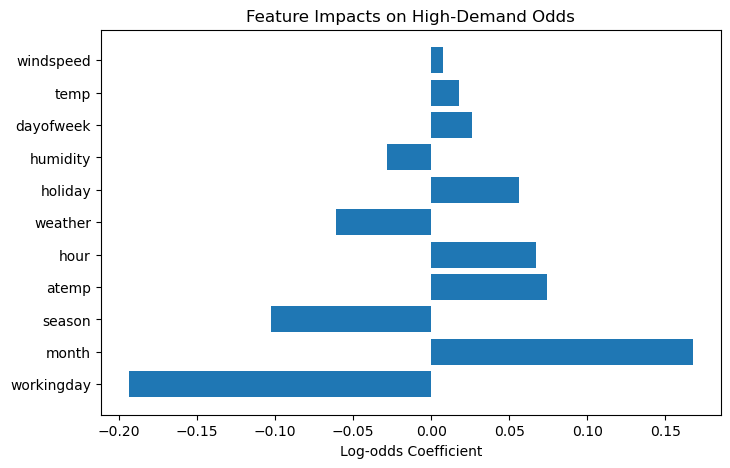

In [22]:
plt.figure(figsize=(8,5))
plt.barh(coef_df['feature'], coef_df['coefficient'])
plt.title('Feature Impacts on High‑Demand Odds')
plt.xlabel('Log‑odds Coefficient')
plt.show()